<a href="https://colab.research.google.com/github/bdfd/Project_05-House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

## Basic Approach

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [1]:
!pip install table-nan-val
!pip install execdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import table_nan_val as tnv
import execdata as exe

In [3]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_05-House_Price_Prediction/main/display%20demo'
dataset_1 = 'train.csv'
dataset_2 = 'test.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_2), encoding = 'utf-8')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (1460, 81) and dataset_2 size is (1459, 80)


In [6]:
# Check column name and categories
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Find any missing or null value
df.info()
# df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



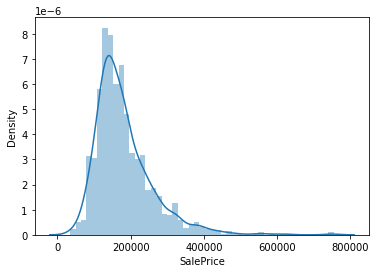

In [10]:
# print(df_train['SalePrice'].value_counts())
# df_train['SalePrice'].value_counts().plot(kind='bar')
sns.distplot(df['SalePrice'])

## Guess Analysis
I went through this dataset and concluded that the following variables might play an important role in this problem:

1. OverallQual.
2. YearBuilt.
3. TotalBsmtSF.
4. GrLivArea.
I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). 
This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

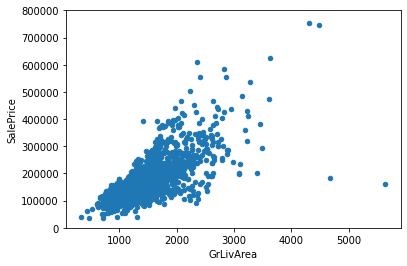

In [11]:
x_variable = 'GrLivArea'
y_variable = 'SalePrice'
data = pd.concat([df[x_variable],df[y_variable]],axis=1)
data.plot.scatter(x=x_variable, y=y_variable, ylim=(0,800000))

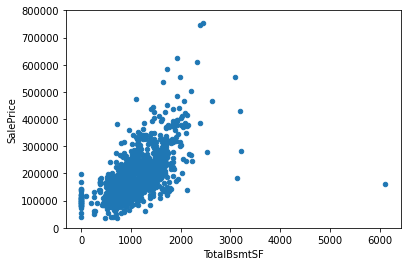

In [12]:
x_variable = 'TotalBsmtSF'
y_variable = 'SalePrice'
data = pd.concat([df[x_variable],df[y_variable]],axis=1)
data.plot.scatter(x=x_variable, y=y_variable, ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

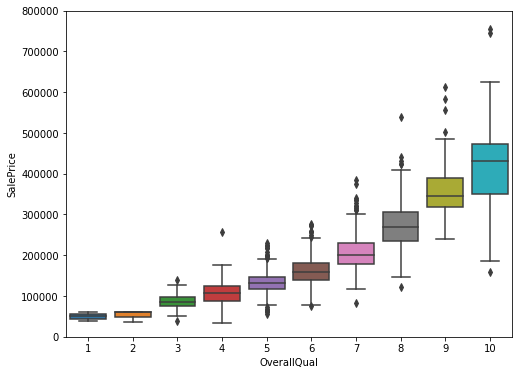

In [13]:
x_variable = 'OverallQual'
y_variable = 'SalePrice'
data = pd.concat([df[x_variable],df[y_variable]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=x_variable, y=y_variable, data=data)
fig.axis(ymin=0, ymax=800000)

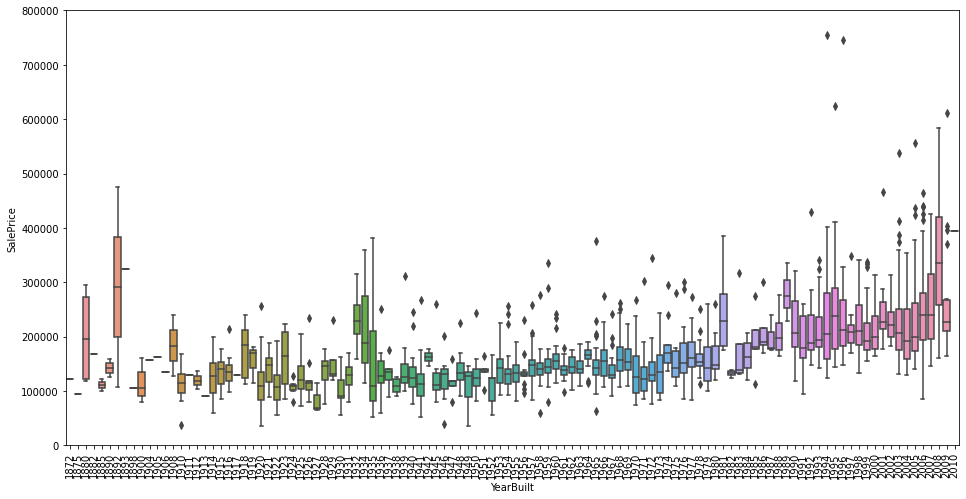

In [14]:
x_variable = 'YearBuilt'
y_variable = 'SalePrice'
data = pd.concat([df[x_variable], df[y_variable]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=x_variable, y=y_variable, data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In summary
Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

## EDA Exploratory Data Analysis


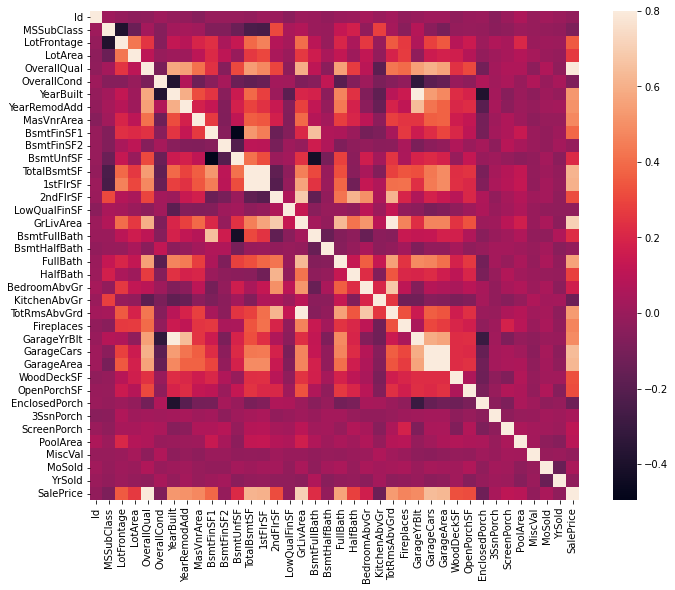

In [15]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

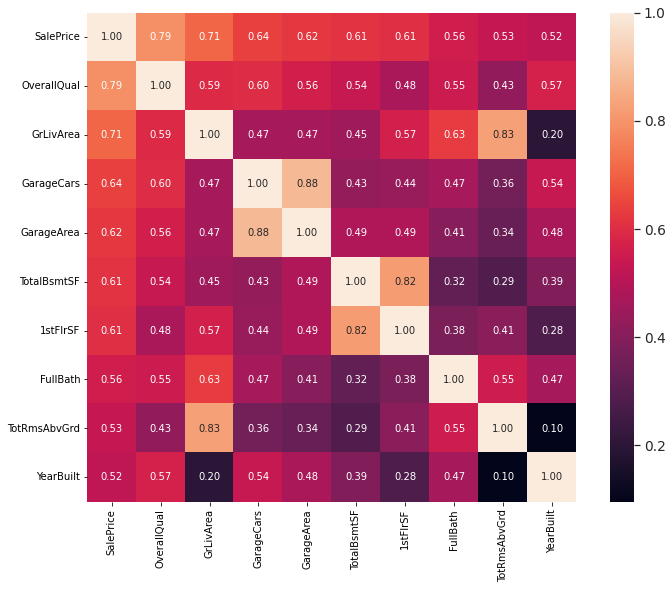

In [16]:
#Limit the Saleprice correlation matrix to top 10 characteristics
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to Correlation Heatmap, these variables most correlated with 'SalePrice'. My thoughts on this:

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. Therefore, we just need one of these variables in our analysis (we can keep 'GarageArea'.
3. 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. 
4. 'FullBath', Well maybe people prefer the independent Room with bathroom rather than share the bathroom
5. 'TotRmsAbvGrd'-Total rooms above grade and 'GrLivArea'-Above grade (ground) living area square feet.
6. 'YearBuilt'. It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

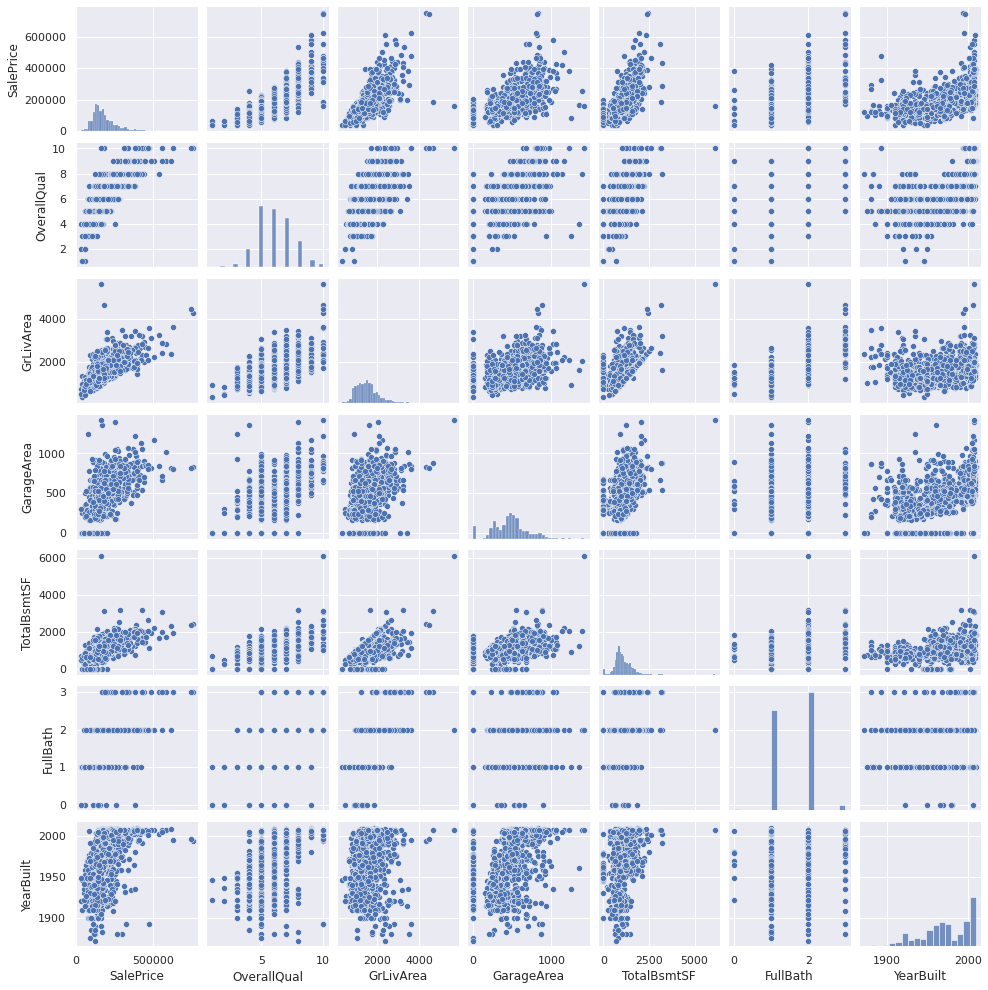

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2)
plt.show();

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


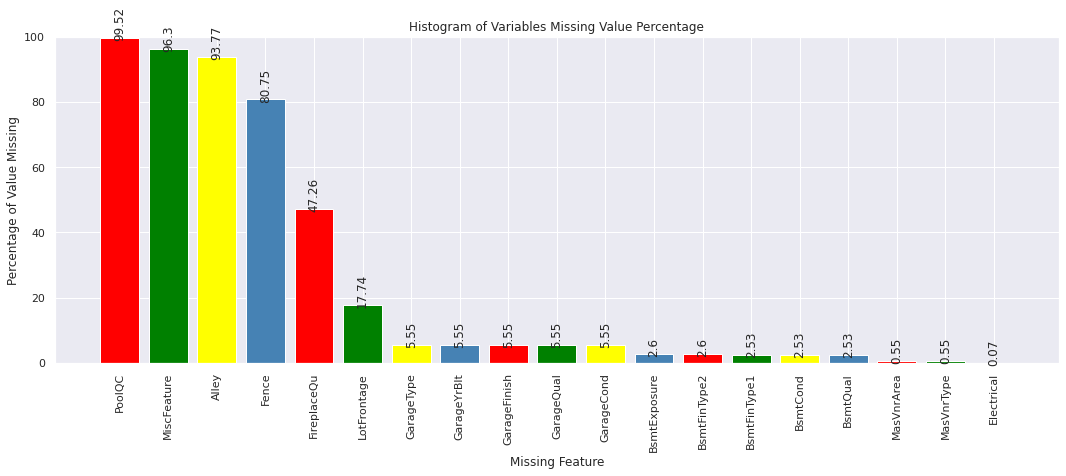

,index,Miss_Values,Miss_Rate,Available_Value
16,PoolQC,1453,99.52,7
18,MiscFeature,1406,96.30,54
1,Alley,1369,93.77,91
17,Fence,1179,80.75,281
10,FireplaceQu,690,47.26,770
0,LotFrontage,259,17.74,1201
11,GarageType,81,5.55,1379
12,GarageYrBlt,81,5.55,1379
13,GarageFinish,81,5.55,1379
14,GarageQual,81,5.55,1379


In [18]:
tnv.Missing_Value_Analysis(df)

In Summary  
We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [19]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [26]:
delete_columns = missing_data[missing_data['Total']>1].index
delete_columns
df = df.drop(labels=delete_columns, axis=1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

KeyError: ignored

In [27]:
df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [25]:
#deleting points
a = df.sort_values(by = 'GrLivArea', ascending = False)[:2].index
a

Int64Index([1298, 523], dtype='int64')

In [ ]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'target variable name'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)
# we create the test train split first


In [ ]:
# pd.DataFrame(X_train).to_csv('train_x.csv')
# pd.DataFrame(X_test).to_csv('test_x.csv')
# pd.DataFrame(y_train).to_csv('train_y.csv')
# pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

In [ ]:
KNeighborsClassifier().get_params()

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

In [ ]:
rf_model = knn_grid_model.best_estimator_
rf_model 

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))